## 1.0 Data - Login Challenge
Data for this project contains simulated timestamps of user logins in a particular geographic location.

Let us import useful python library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

Let us read the json file that forms our the data set: login.json

In [2]:
import json
with open('logins.json') as data_file:
    data = json.load(data_file)

Let us display the json file:

In [3]:
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

### 1.0.1 Task 1
The first task is to aggregate these login counts based on 15-minute intervals. To achieve this, we will first of all convert the dict object above to pandas dataframe:

In [4]:
df = pd.DataFrame(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df['login_time'] = pd.to_datetime(df['login_time'])

Then we index on the timestamp column:

In [6]:
df.set_index('login_time', inplace=True)
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


Then we resample using 15 minutes interval

Add a numeric column (this is needed for resampling to aggregate):

In [7]:
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


And finally resample as needed:

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df_master = df.resample('15T', how = sum)

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


Let us derive necessary information and summary from the dataframe

In [10]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9381 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB


### 1.0.1 Task 2
The second task is to visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

The time series visualization will be done using matplotlib. Let us use the standard convention for referencing the matplotlib API:

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.0.1.1 Time Series Line Plot

Let us generate a basic plot of the login_time count

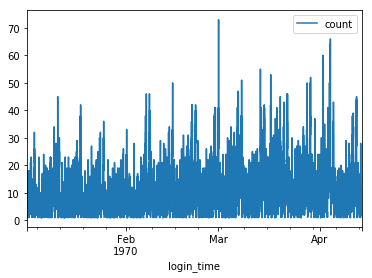

In [12]:
df_master.plot()

We try to delineate the series clearly. The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument).
We could change this example to use a dashed line by setting style to be ‘k–-‘.

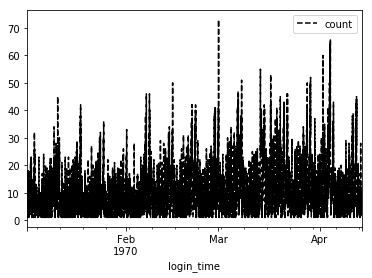

In [13]:
 plt.figure(); df_master.plot(style='k--', label='Series'); plt.legend()

Let us pass logy to get a log-scale Y axis.

In [14]:
df_master = np.exp(df_master)

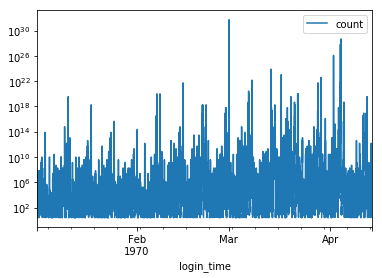

In [15]:
df_master.plot(logy=True)

### 1.0.3 Task 3
The third task is to report/illustrate important features of the demand such as daily cycles
and to report data quality issues.

#### Daily and Monthly Cycle

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.
The login time dataset spans 1 year. We can group data by month and create a line plot for each month for direct comparison.

The example below shows how to do this. First the observations are grouped by month (series.groupby(TimeGrouper(‘M’))).
The groups are then enumerated and the observations for each month are stored as columns in a new DataFrame.

Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

In [16]:
from pandas import TimeGrouper
from pandas import DataFrame
from pandas import Series

Generate daily cycle of time series data

In [17]:
df_daily = df.resample('1440T', how = sum)

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


Plot the daily cycle

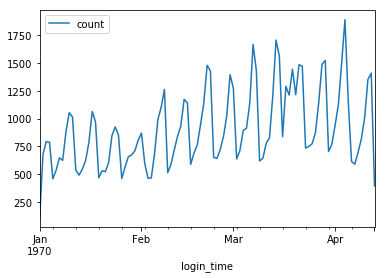

In [18]:
df_daily.plot()

#### Time Series Histogram and Density Plots

Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

The example below creates a histogram plot of the observations in the daily login time dataset. A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D8037B8>]], dtype=object)

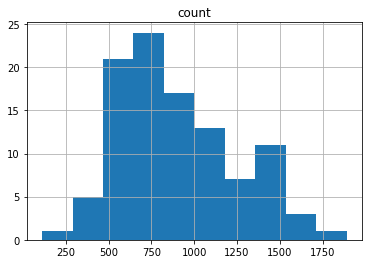

In [19]:
df_daily.hist()

Running the example shows a distribution that looks Gaussian. The plotting function automatically selects the size of the bins based on the spread of values in the data.

We can get a better idea of the shape of the distribution of observations by using a density plot.

This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution. Below is an example of a density plot of the Daily login time dataset.

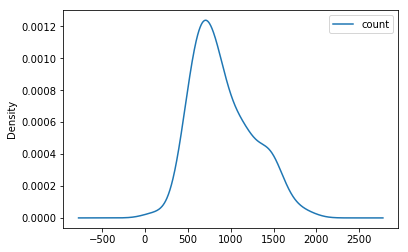

In [20]:
df_daily.plot(kind='kde')

Running the above gives a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

#### Time Series Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Below is an example of grouping the Daily login-time dataset. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

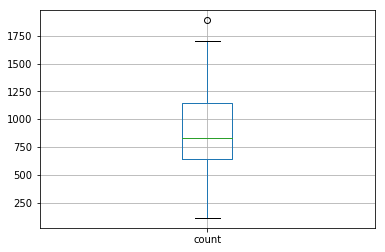

In [21]:
df_daily.boxplot()

Comparing box and whisker plots by consistent intervals is a useful tool. Within an interval, it can help to spot outliers (dots above or below the whiskers).

#### Time Series Heat Maps
A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color.

This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).

Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the daily login time, the observations can be arranged into a matrix of count-columns and days-rows, with login time in the cell for each day. A heat map of this matrix can then be plotted. For convenience, the matrix is rotation (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

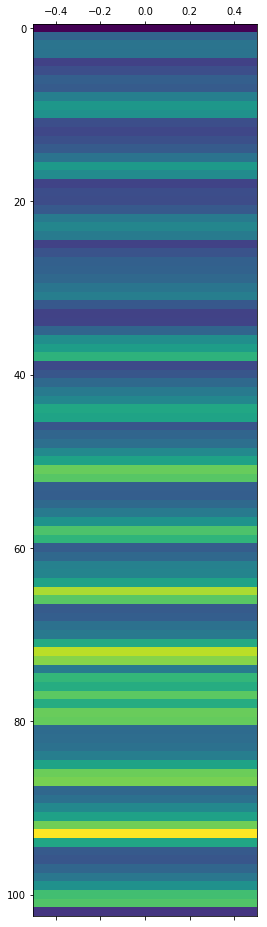

In [22]:
plt.matshow(df_daily, interpolation=None, aspect='auto')

#### Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

* If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship. 
* If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

Either relationship is good as they can be modeled. More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship. Below is an example of a lag plot for the Daily login time dataset.

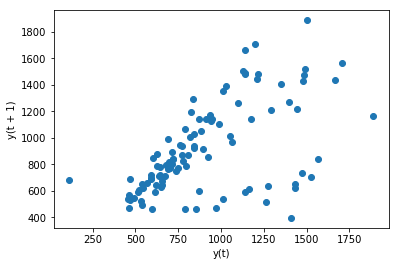

In [23]:
from pandas.tools.plotting import lag_plot
lag_plot(df_daily)

#### Time Series Autocorrelation Plots
We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Daily login time:

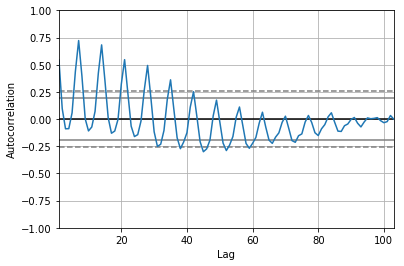

In [24]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df_daily)

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

We can see that for the Daily login time dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

### 2.0 Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### 2.0.1 The key measure of success of this experiment
1. We would choose the key measure of success of this experiment in encouraging driver partners to serve both cities, and 
2. Explain why we would chose this metric?

The key measure of success of this experiment in encouraging driver partners to serve both cities is the percent of the user’s trips occurring during a weekend after the toll costs have been reimbursed. 

This is because on weekends, there is reasonable activity in both cities. Improving access to these two cities over the weekend will encourage drivers to serve both cities

#### 2.0.2. Experimental Design
We would now describe a practical experiment which we have designed to compare the effectiveness of the proposed change in relation to the key measure of success. 

These are the key points:
* how the experiment is implemented
* The statistical test(s) conducted to verify the significance of the observation
* Interpretation of the results 
* Recommendations to the city operations team along with any caveats.


A factorial experimental design is appropriate for the exploratory stages which this experiment tends to explore: especially in this case, the effects of variables or their interactions on a system response are poorly understood or not quantifiable. The design will be a full factorial design with two levels. 

The analysis begins with a two-level, three-variable experimental design, with n=12 levels for each factor, k=n different factors. We start by encoding each of the n variables to something generic: (x1,x2,x3, ... , xn). A dataframe with input variable values is then populated.

The input labels include:
* x1: average distance
* x2: average rating by driver
* x3: average rating of driver
* x4: average surge
* x5: city
* x6: last trip date
* x7: phone
* x8: signup date
* x9: surge pct
* x10: trips in first 30 days
* x11: ultimate black user
* x12: weekday pct

#### Data
Read the json data: ultimate_data_challenge.json

In [25]:
import json
with open('ultimate_data_challenge.json') as data_file:
    data = json.load(data_file)

In [26]:
data

[{'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'city': "King's Landing",
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'signup_date': '2014-01-25',
  'surge_pct': 15.4,
  'trips_in_first_30_days': 4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2},
 {'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'signup_date': '2014-01-29',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0},
 {'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'signup_date': '2014-01-06',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 3,
  'ultimate_black_user': False,
  'weekday_pct': 100.0},
 {'avg_dist': 2.36,
  'avg_rating_by_driver

In [27]:
inputs_labels = {'x1': 'average_distance',
'x2': 'average_rating_by_driver',
'x3': 'average_rating_of_driver',
'x4': 'average_surge',
'x5': 'city',
'x6': 'last_trip_date',
'x7': 'phone',
'x8': 'signup_date',
'x9': 'surge_pct',
'x10': 'trips_in_first_30_days',
'x11': 'ultimate_black_user',
'x12': 'weekday_pct'}

In [28]:
inputs_df = pd.DataFrame(data)
inputs_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [29]:
inputs_df.set_index('signup_date')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
signup_date,,,,,,,,,,,
2014-01-25,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,15.4,4,True,46.2
2014-01-29,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,0.0,0,False,50.0
2014-01-06,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,0.0,3,False,100.0
2014-01-10,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,20.0,9,True,80.0
2014-01-27,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,11.8,14,False,82.4
2014-01-09,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,0.0,2,True,100.0
2014-01-24,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,0.0,1,False,100.0
2014-01-28,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,0.0,2,False,100.0
2014-01-21,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,0.0,2,False,100.0


In [30]:
df= inputs_df.groupby('city').mean()
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
city,,,,,,,,
Astapor,5.427940,4.798853,4.630593,1.086522,10.140305,1.948651,0.391738,60.370050
King's Landing,5.976596,4.853162,4.706997,1.070707,9.966979,2.463672,0.415202,63.232290
Winterfell,5.980153,4.730909,4.532996,1.068194,7.449927,2.431179,0.350146,60.318936


In [31]:
df['Index']=2

In [32]:
df['Index'].iloc[0:3]=['x1', 'x2', 'x3']

C:\Users\Angus\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Index
city,,,,,,,,,
Astapor,5.427940,4.798853,4.630593,1.086522,10.140305,1.948651,0.391738,60.370050,x1
King's Landing,5.976596,4.853162,4.706997,1.070707,9.966979,2.463672,0.415202,63.232290,x2
Winterfell,5.980153,4.730909,4.532996,1.068194,7.449927,2.431179,0.350146,60.318936,x3


In [34]:
df_U= df[['avg_rating_of_driver', 'avg_rating_by_driver', 'Index']]
df_U

,avg_rating_of_driver,avg_rating_by_driver,Index
city,,,
Astapor,4.630593,4.798853,x1
King's Landing,4.706997,4.853162,x2
Winterfell,4.532996,4.730909,x3


In [35]:
df_U.columns = ['High', 'Low', 'label']
df_U

,High,Low,label
city,,,
Astapor,4.630593,4.798853,x1
King's Landing,4.706997,4.853162,x2
Winterfell,4.532996,4.730909,x3


Next, we encode the variable values. For an arbitrary variable value  ϕ1, the value of the variable can be coded to be between -1 and 1 according to the formula:

In [36]:
df_U['average'] = df_U.apply( lambda z : ( z['High'] + z['Low'])/2 , axis=1)
df_U['span'] = df_U.apply( lambda z : ( z['High'] - z['Low'])/2 , axis=1)

df_U['encoded_low']  = df_U.apply( lambda z : ( z['Low']  - z['average'] )/( z['span'] ), axis=1)
df_U['encoded_high'] = df_U.apply( lambda z : ( z['High'] - z['average'] )/( z['span'] ), axis=1)

df_U

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,High,Low,label,average,span,encoded_low,encoded_high
city,,,,,,,
Astapor,4.630593,4.798853,x1,4.714723,-0.084130,-1.0,1.0
King's Landing,4.706997,4.853162,x2,4.780079,-0.073082,-1.0,1.0
Winterfell,4.532996,4.730909,x3,4.631952,-0.098956,-1.0,1.0


### Design of the Experiment
While everything preceding this point is important to state, to make sure we're being consistent and clear about our problem statement and assumptions, nothing preceding this point is particularly important to understanding how experimental design works. This is simply illustrating the process of transforming one's problem from a problem-specific problem space to a more general problem space.

### Inputs and Responses
Box and Draper present the results (observed outcomes) of a  2^3  factorial experiment. The  2^3 comes from the fact that there are 2 levels for each variable (-1 and 1) and three variables (x1, x2, and x3). The observed, or output, variable is the number of cycles to failure for a particular piece of machinery; this variable is more conveniently cast as a logarithm, as it can be a very large number.

Each observation data point consists of three input variable values and an output variable value,  (x1,x2,x3,y), and can be thought of as a point in 3D space  (x1,x2,x3) with an associated point value of y. Alternatively, this might be thought of as a point in 4D space (the first three dimensions are the location in 3D space where the point will appear, and the y value is when it will actually appear).

The input variable values consist of all possible input value combinations, which we can produce using the itertools module:

In [37]:
import itertools
encoded_inputs = list( itertools.product([-1,1],[-1,1],[-1,1]) )
encoded_inputs

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]

Now we implement the observed outcomes; more conveniently scaled by taking  log10() (which will rescale them to be integers between 1 and 4).

In [38]:
results = [(-1, -1, -1, 46.2),
 (-1, -1, 1, 50.0),
 (-1, 1, -1, 100.0),
 (-1, 1, 1, 80.0),
 (1, -1, -1, 82.4),
 (1, -1, 1, 95.2),
 (1, 1, -1, 80.8),
 (1, 1, 1, 77.0)]

results_df = pd.DataFrame(results,columns=['x1','x2','x3','y'])
results_df['logy'] = results_df['y'].map( lambda z : np.log10(z) )
results_df

,x1,x2,x3,y,logy
0,-1,-1,-1,46.2,1.664642
1,-1,-1,1,50.0,1.698970
2,-1,1,-1,100.0,2.000000
3,-1,1,1,80.0,1.903090
4,1,-1,-1,82.4,1.915927
5,1,-1,1,95.2,1.978637
6,1,1,-1,80.8,1.907411
7,1,1,1,77.0,1.886491


### Computing Main Effects
Now we compute the main effects of each variable using the results of the experimental design. We'll use some shorthand Pandas functions to compute these averages: the groupby function, which groups rows of a dataframe according to some condition (in this case, the value of our variable of interest  xi ).

In [39]:
# Compute the mean effect of the factor on the response,
# conditioned on each variable
labels = ['x1','x2','x3']

main_effects = {}
for key in labels:
    
    effects = results_df.groupby(key)['logy'].mean()

    main_effects[key] = sum( [i*effects[i] for i in [-1,1]] )

main_effects

{'x1': 0.10544106978614276,
 'x2': 0.10970398324131914,
 'x3': -0.0051982207857268481}

### Analyzing Main Effects
The main effect of a given variable (as defined by Yates 1937) is the average difference in the level of response as the input variable moves from the low to the high level. If there are other variables, the change in the level of response is averaged over all combinations of the other variables.

Now that we've computed the main effects, we can analyze the results to glean some meaningful information about our system. The first variable x1 has a positive effect of 0.10 - this indicates that when x1 goes from its low level to its high level, it increases the value of the response (the weekday percent surge). This means x1 should be increased, if we want to make our create more visit driver's visit between the cities. However x2's effect was the largest, meaning it's the variable we should consider changing first.

This might be the case if, for example, changing the value of the input variables were capital-intensive. The company might decide that they can only afford to change one variable, x1, x2, or x3. If this were the case, increasing x2 would be the way to go.

In contrast, increasing the variable x3 will result in a decrease in interaction between the two cities, since this has a negative main effect. This variable should be kept at their lower levels, or decreased, to increase the visit to the two cities.

## 3.0 Predictive Modelling

### 3.0.1 Data
The data comprise a dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

The target variable: trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

Predictor Variables:
* this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

#### 3.0.1.0 Data Cleaning

First load the data

In [40]:
# read the json file
import json
with open('ultimate_data_challenge.json') as data_file:
    data = json.load(data_file)

In [41]:
# display the data
data

[{'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'city': "King's Landing",
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'signup_date': '2014-01-25',
  'surge_pct': 15.4,
  'trips_in_first_30_days': 4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2},
 {'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'signup_date': '2014-01-29',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0},
 {'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'signup_date': '2014-01-06',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 3,
  'ultimate_black_user': False,
  'weekday_pct': 100.0},
 {'avg_dist': 2.36,
  'avg_rating_by_driver

Convert data to pandas dataframe

In [42]:
df = pd.DataFrame(data)
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


Print information about the dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are some missing numbers in the columns 'avg_rating_by_driver', 'avg_rating_of_driver' and 'phone'.  Confirm missing numbers:

In [44]:
df.isnull().values.any()

True

In [45]:
# Get the summary statistics of the dataset
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


##### Filling the missing values
For the columns: 'avg_rating_by_driver' and 'avg_rating_of_driver', we will use the average (mean) to replace the missing or null values

In [46]:
# The mean
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].fillna(value=4.778158)

In [47]:
# The mean
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].fillna(value=4.601559)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


3.0.1.1 Visualization

Create a column for retained users: if user were “active” (i.e. took a trip) in the preceding 30 days assign the number 1 otherwise assign 0

In [49]:
df['retained'] = np.where(df['trips_in_first_30_days'] > 0, 1,0)
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,1
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,1


### A: Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009A24358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018240390>]], dtype=object)

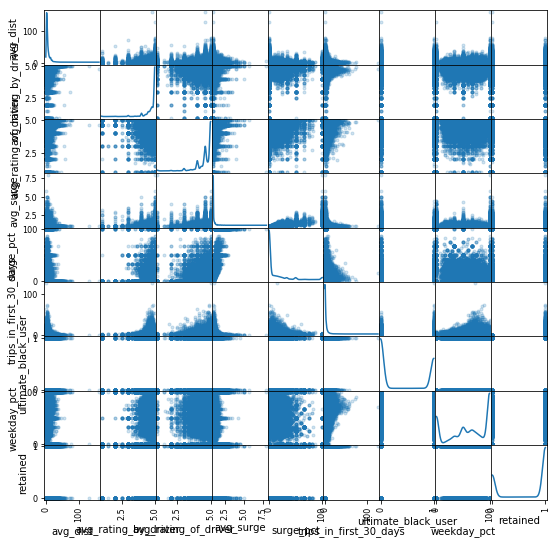

In [50]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(9, 9), diagonal='kde')

### B: Univariate distributions

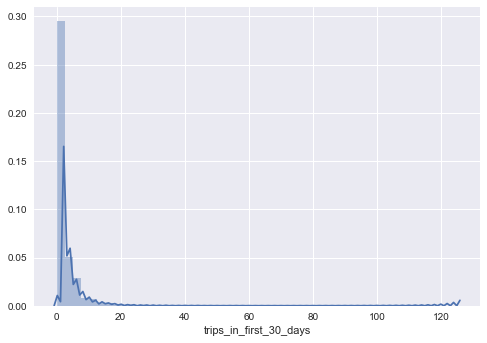

In [51]:
import seaborn as sns
sns.set(color_codes=True)
x = df['trips_in_first_30_days']
sns.distplot(x)

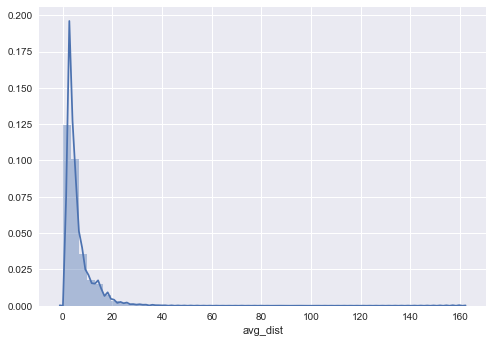

In [52]:
x = df['avg_dist']
sns.distplot(x)
#	avg_rating_by_driver	avg_rating_of_driver

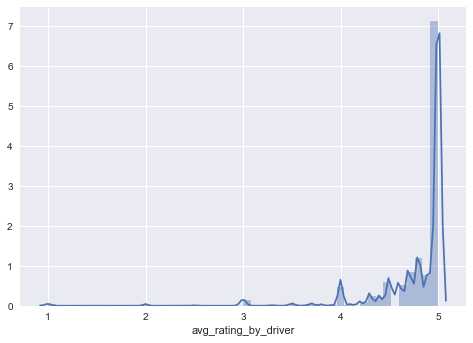

In [53]:
x = df['avg_rating_by_driver']
sns.distplot(x)
#		

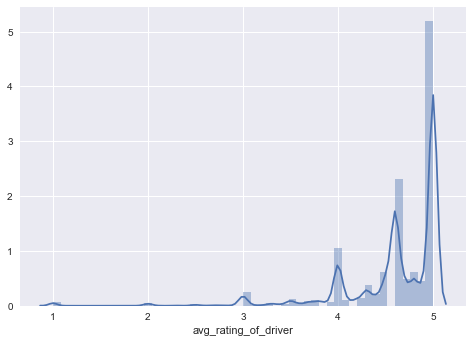

In [54]:
x = df['avg_rating_of_driver']
sns.distplot(x)

### C: Histograms

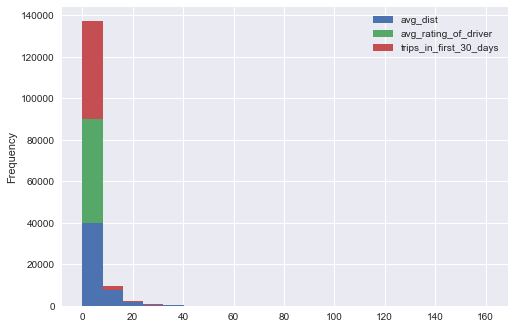

In [55]:
df[['avg_dist','avg_rating_of_driver', 'trips_in_first_30_days']].plot.hist(stacked=True, bins=20)

### Box Plots

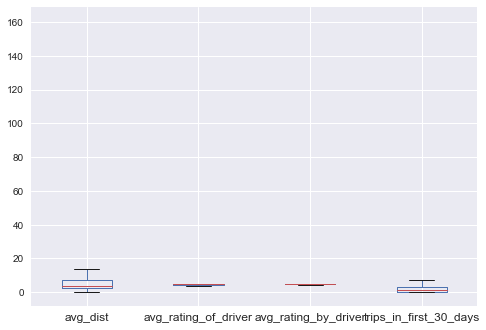

In [56]:
df[['avg_dist','avg_rating_of_driver', 'avg_rating_by_driver', 'trips_in_first_30_days']].boxplot()

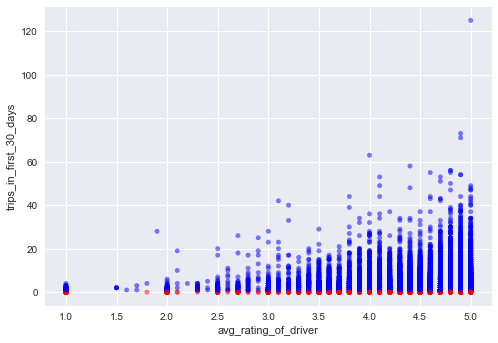

In [57]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = df.plot.scatter(x='avg_rating_of_driver', y='trips_in_first_30_days', c=[cm_bright.colors[i] for i in df.retained == 1], alpha=0.5);

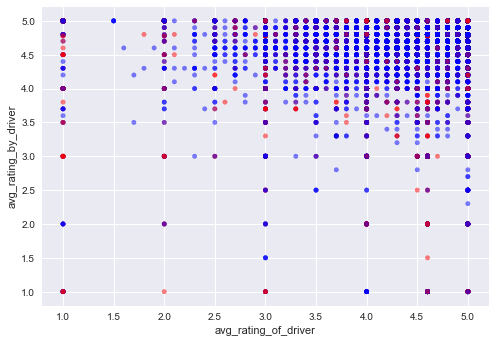

In [58]:
ax = df.plot.scatter(x='avg_rating_of_driver', y='avg_rating_by_driver', c=[cm_bright.colors[i] for i in df.retained == 1], alpha=0.5);

#### Fraction of the observed users retained
What fraction of the observed users were retained?

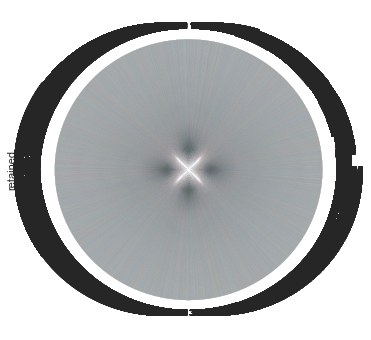

In [59]:
df['retained'].plot.pie(figsize=(6, 6))

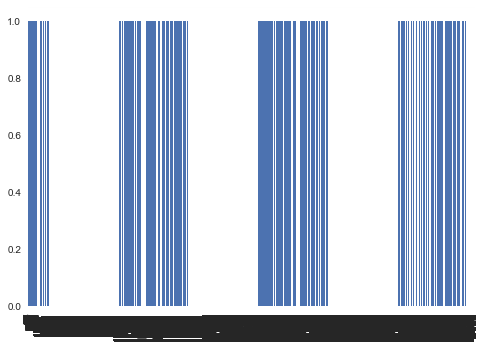

In [60]:
df['retained'].plot.bar()

In [61]:
df[df['retained'] == 1].count()/(df[df['retained'] == 0].count() + df[df['retained'] == 1].count())*100

avg_dist                  69.220000
avg_rating_by_driver      69.220000
avg_rating_of_driver      69.220000
avg_surge                 69.220000
city                      69.220000
last_trip_date            69.220000
phone                     69.131522
signup_date               69.220000
surge_pct                 69.220000
trips_in_first_30_days    69.220000
ultimate_black_user       69.220000
weekday_pct               69.220000
retained                  69.220000
dtype: float64

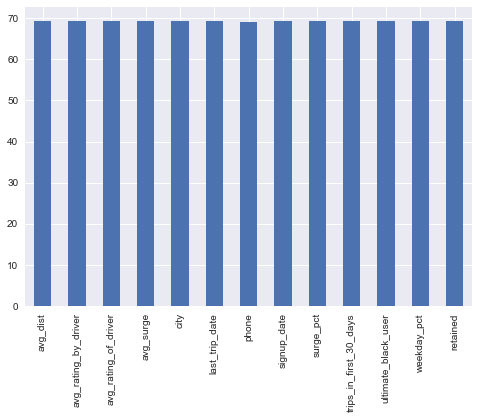

In [62]:
(df[df['retained'] == 1].count()/(df[df['retained'] == 0].count() + df[df['retained'] == 1].count())*100).plot.bar()

69% of the drivers are retained

## Predictive Model
### Time in the system

convert columns: 'last_trip_date' and 'signup_date' to timestamp from strings

In [63]:
df['last_trip_date']= pd.to_datetime(df['last_trip_date'])

In [64]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB


In [66]:
df['months_in_system'] = df['last_trip_date'].sub(df['signup_date'], axis=0)

In [67]:
df['months_in_system'] = df['months_in_system'] / np.timedelta64(1, 'D')

In [68]:
df['months_in_system'] = df['months_in_system'] / 28

In [69]:
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,months_in_system
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,5.107143
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,3.428571
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0.035714
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,6.071429
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,1.678571
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1,5.285714
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1,0.035714
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1,0.035714
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,1,0.392857
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,1,0.071429


###  Problem Statement
In order to help Ultimate determine whether or not a user will be active in their 6th month on the system we will build a predictive model by classifying the users into those that are active in the system through the preceeding 30 days and those that are not active.

A very important predictive variable is:
* months_in_system

Other precictive variables are those that contain floats and integers:

In [ ]:
#Drop none-float columns that would not be used for prediction
df.drop(['city', 'last_trip_date', 'phone', 'signup_date', 'ultimate_black_user'], axis=1, inplace=True)

In [74]:
df_pred = df


In [75]:
df_pred.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,months_in_system
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,5.107143
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,3.428571
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0.035714
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,6.071429
4,3.13,4.9,4.4,1.19,11.8,14,82.4,1,1.678571


In [76]:
#define target variable
df_target = df['retained']

In [77]:
df_pred.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,months_in_system
avg_dist,1.000000,0.079793,0.028508,-0.081491,-0.104414,-0.136329,0.101652,-0.070223,-0.109431
avg_rating_by_driver,0.079793,1.000000,0.101660,0.010498,0.019964,-0.039097,0.020366,-0.019392,-0.032651
avg_rating_of_driver,0.028508,0.101660,1.000000,-0.021653,-0.003290,-0.011060,0.012587,-0.027820,-0.015183
avg_surge,-0.081491,0.010498,-0.021653,1.000000,0.793582,-0.001841,-0.110071,0.010328,-0.016809
surge_pct,-0.104414,0.019964,-0.003290,0.793582,1.000000,0.005720,-0.144918,0.011245,0.004068
trips_in_first_30_days,-0.136329,-0.039097,-0.011060,-0.001841,0.005720,1.000000,0.050388,0.400560,0.164784
weekday_pct,0.101652,0.020366,0.012587,-0.110071,-0.144918,0.050388,1.000000,-0.006712,0.020408
retained,-0.070223,-0.019392,-0.027820,0.010328,0.011245,0.400560,-0.006712,1.000000,-0.211047
months_in_system,-0.109431,-0.032651,-0.015183,-0.016809,0.004068,0.164784,0.020408,-0.211047,1.000000


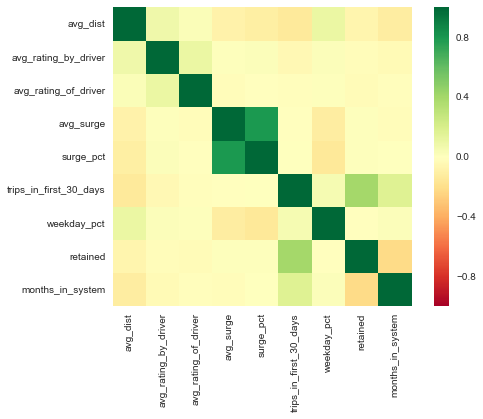

In [78]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

As could be observed, the months in the system has negative correlation with user retention. This is interesting and need to be investigated further. 

Drop the target variable: 'retained' from df_pred and convert set to a numpy arraye

In [79]:
df_pred.drop(['retained'], axis=1, inplace=True)

In [80]:
# convert df_pred to numpy array
df_pred.values

array([[  3.67000000e+00,   5.00000000e+00,   4.70000000e+00, ...,
          4.00000000e+00,   4.62000000e+01,   5.10714286e+00],
       [  8.26000000e+00,   5.00000000e+00,   5.00000000e+00, ...,
          0.00000000e+00,   5.00000000e+01,   3.42857143e+00],
       [  7.70000000e-01,   5.00000000e+00,   4.30000000e+00, ...,
          3.00000000e+00,   1.00000000e+02,   3.57142857e-02],
       ..., 
       [  3.86000000e+00,   5.00000000e+00,   5.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+02,   3.96428571e+00],
       [  4.58000000e+00,   3.50000000e+00,   3.00000000e+00, ...,
          2.00000000e+00,   1.00000000e+02,   3.57142857e-02],
       [  3.49000000e+00,   5.00000000e+00,   4.60155900e+00, ...,
          0.00000000e+00,   0.00000000e+00,   3.28571429e+00]])

In [82]:
# calculate the shape of the numpy array (df_sales.values)
df_pred.values.shape

(50000, 8)

In [83]:
# convert df_target to numpy array
df_target.values

array([1, 0, 1, ..., 0, 1, 0])

In [84]:
# calculate the shape of the numpy array (df_target.values)
df_target.values.shape

(50000,)

In [85]:
# Confirm that both df_pred.values and df_target.values are numpy arrays
type(df_pred.values), type (df_target.values)

(numpy.ndarray, numpy.ndarray)

Thus we have 50000 samples and 8 features

In [86]:
# Assign X and y to the features and target data respectively
X = df_pred.values
y = df_target.values

In [87]:
# Build the data frame of the feature data
df_feature = pd.DataFrame(X, columns=df_pred.columns.values)

Generate scattter plot for df_features. We will extract the first five features for visualization

In [88]:
#Extract the first five features for visualization 
df_5feature = df_feature.iloc[:,0:4]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000861A45F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000008AE9B940>]], dtype=object)

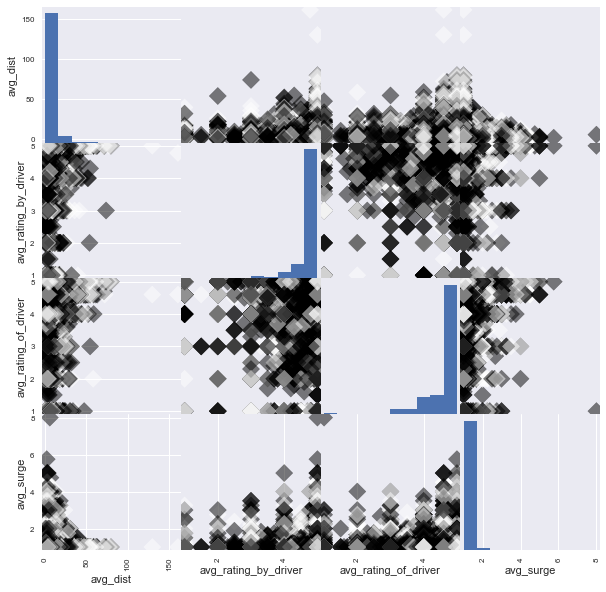

In [91]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
pd.scatter_matrix(df_5feature, c=y, figsize = [10, 10], s=150, marker = 'D')

### k-Nearest Neighbors
The basic idea in this analysis is to predict the label of a data point by

Looking at the 'k' closest labeled data points
Taking a majority vote

#### Fitting a Classifier¶
Firstly, we will import necessary libraries. Then we will create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.

In [92]:
# import classifier
from sklearn.neighbors import KNeighborsClassifier

# Set n_neighbors = 6 and assign it to knn
knn = KNeighborsClassifier(n_neighbors=6)

In [93]:
# fit the classifier to the data set
knn.fit(df_pred.values, df_target.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### Measuring the Model's Performance
We are going to use accuracy as our metric for measuring the model's performance. Accuracy is the fraction of correct predictions. Here we are concerned on how well our model performs on new data. In order to achieve this, we will split the data into two:

* a training set
* a test set

We will fit/train the classifier on the training set, then we will make predictions on the test set. And then we will compare the prediction with the known labels by computing the accuracy of the model.

### Splitting the data
Import the required libraries

In [94]:
#import libraries
from sklearn.model_selection import train_test_split

In [95]:
# randomly split the data so that the test_size will be 1/3 of the initial sample size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [96]:
#define the classifier
knn = KNeighborsClassifier(n_neighbors=8)

In [97]:
#fit the classifier to the X_train and y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

### Prediction
We will run prediction on the X_test and store the result as y_pred

In [98]:
y_pred = knn.predict(X_test)

In [99]:
# print the test set
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [0 0 1 ..., 0 1 1]


#### Model Accuracy
To compute the accuracy of the model we use score:

In [100]:
knn.score(X_test, y_test)

0.96519999999999995

 ### Accuracy Testing (Overfitting & Underfitting)

In [101]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)

In [102]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = 1)

In [103]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [104]:
#Compute accuracy on the training set
train_accuracy_1 = knn.score(X_train, y_train)
train_accuracy_1

1.0

In [105]:
#Compute accuracy on the testing set
test_accuracy_1 = knn.score(X_test, y_test)
test_accuracy_1

0.9718

In [106]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [107]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [108]:
#Compute accuracy on the training set
train_accuracy_2 = knn.score(X_train, y_train)
train_accuracy_2

0.98694285714285712

In [109]:
#Compute accuracy on the testing set
test_accuracy_2 = knn.score(X_test, y_test)
test_accuracy_2

0.96393333333333331

In [110]:
# For n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
train_accuracy_3 = knn.score(X_train, y_train)
test_accuracy_3 = knn.score(X_test, y_test)

In [111]:
# For n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
train_accuracy_4 = knn.score(X_train, y_train)
test_accuracy_4 = knn.score(X_test, y_test)

In [112]:
# For n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
train_accuracy_5 = knn.score(X_train, y_train)
test_accuracy_5 = knn.score(X_test, y_test)

In [113]:
# For n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
train_accuracy_6 = knn.score(X_train, y_train)
test_accuracy_6 = knn.score(X_test, y_test)

In [114]:
# For n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
train_accuracy_7 = knn.score(X_train, y_train)
test_accuracy_7 = knn.score(X_test, y_test)

In [115]:
# For n_neighbors = 8
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
train_accuracy_8 = knn.score(X_train, y_train)
test_accuracy_8 = knn.score(X_test, y_test)

In [116]:
test_accuracy = [test_accuracy_1, test_accuracy_2, test_accuracy_3, test_accuracy_4, test_accuracy_5, test_accuracy_6, 
                 test_accuracy_7, test_accuracy_8]

In [117]:
train_accuracy = [train_accuracy_1, train_accuracy_2, train_accuracy_3, train_accuracy_4,  train_accuracy_5, train_accuracy_6, 
                  train_accuracy_7, train_accuracy_8]

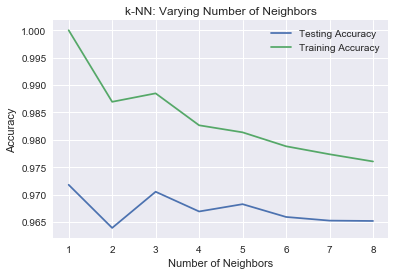

In [118]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Comparison of different Classifiers

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [120]:
# Different classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [121]:
# Compute the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

### Long term Retention

With accuracy score above 90%, we are fairly confident that customer retention could be effectively predicted by the eight predictor variables. Ultimate should always be on the look out for the rating of the drivers and the distance they cover. These variables do have significant effect on the willingness of the drivers to continue driving for Ultimate. 